In [106]:
#importing the libraries
import pandas as pd
import numpy as np

In [107]:
#read all the csv files
files1=pd.read_csv('Consulting 1.csv',encoding = "ISO-8859-1")
files2=pd.read_csv('Consulting 2.csv',encoding = "ISO-8859-1")
files3=pd.read_csv('Consulting 3.csv')
files4=pd.read_csv('Consulting 4.csv',encoding = "ISO-8859-1")
files5=pd.read_csv('Consulting 5.csv')
files6=pd.read_csv('Consulting 6.csv')
files7=pd.read_csv('Consulting 7.csv')
files8=pd.read_csv('ResumeExperience.csv',encoding = "ISO-8859-1")

In [108]:
files3.head()

,Unnamed: 0,id,userid,dimensiontype,score1,score2,score3,score4,finalscore,createDate,createBy,modifyDate,modifyBy
0,1,148316,10040,Detailed,5.00,5.00,2.50,5.00,4.38,2016-11-04 00:00:00,NaN,2016-11-04 00:00:00,NaN
1,2,148317,10040,Idealistic,3.75,3.75,1.25,2.50,2.81,2016-11-04 00:00:00,NaN,2016-11-04 00:00:00,NaN
2,3,148318,10040,Creative,2.50,2.50,2.50,3.75,2.81,2016-11-04 00:00:00,NaN,2016-11-04 00:00:00,NaN
3,4,148319,10040,Learning Orientated,5.00,5.00,5.00,5.00,5.00,2016-11-04 00:00:00,NaN,2016-11-04 00:00:00,NaN
4,5,148320,10040,Loyal,3.75,3.75,3.75,2.50,3.44,2016-11-04 00:00:00,NaN,2016-11-04 00:00:00,NaN


# Section: Converting Rchilli experience Data to add to the main dataframe

## files8 will need to be replace with the data pull from Mongo

In [109]:
files8.head()

,Unnamed: 0,Alias,Employer,EmployerCity,EmployerCountry,EmployerState,EndDate,ExperienceId,FormattedName,IsoCountry,JobDescription,JobPeriod,RelatedSkills,StartDate,Title,shortlistCandidateId
0,0,Lead Analyst,Mobile Commerce,NaN,NaN,NaN,2/2/2018,1,Lead Analyst,NaN,Responsibilities : Liaise with GSMA programm...,May 2016 - till,NaN,01/05/2016,Lead Analyst,64505
1,1,NaN,NaN,NaN,NaN,NaN,31/5/2016,2,NaN,NaN,Responsibilities : Liaise with GSMA programm...,July 2014 - May 2016,NaN,01/07/2014,Senior Analyst,64505
2,2,NaN,KPMG,NaN,NaN,NaN,31/7/2013,3,NaN,NaN,Responsibilities : Lead company financial ri...,July 2012 - July 2013,NaN,01/07/2012,Advisory Associate,64505
3,3,NaN,Mckinsey and Co. Knowledge Centre,NaN,NaN,NaN,31/7/2012,4,NaN,NaN,Responsibilities : Collect the required info...,November 2010 - July 2012,NaN,01/11/2010,"Analyst, India RegionSpecialist",64505
4,4,"Assistant Team Leader, Assistant Manager, Depu...",Ernst and Young,NaN,NaN,NaN,2/2/2018,1,Assistant Manager,NaN,Transaction Advisory Services\tWorking with Er...,Sep 2012 - Till,NaN,01/09/2012,Assistant Manager,69105


In [110]:
files8= files8.drop('Alias',axis=1)
files8= files8.drop('Unnamed: 0',axis=1)
files8= files8.drop('Employer',axis=1)
files8= files8.drop('EmployerCity',axis=1)
files8= files8.drop('EmployerCountry',axis=1)
files8= files8.drop('EmployerState',axis=1)
files8= files8.drop('FormattedName',axis=1)
files8= files8.drop('IsoCountry',axis=1)
files8= files8.drop('JobDescription',axis=1)
files8= files8.drop('JobPeriod',axis=1)
files8= files8.drop('RelatedSkills',axis=1)
files8= files8.drop('Title',axis=1)

In [111]:
files8.head()

,EndDate,ExperienceId,StartDate,shortlistCandidateId
0,2/2/2018,1,01/05/2016,64505
1,31/5/2016,2,01/07/2014,64505
2,31/7/2013,3,01/07/2012,64505
3,31/7/2012,4,01/11/2010,64505
4,2/2/2018,1,01/09/2012,69105


In [112]:
files8.EndDate=pd.to_datetime(files8.EndDate)
files8.StartDate=pd.to_datetime(files8.StartDate)
files8.head()

,EndDate,ExperienceId,StartDate,shortlistCandidateId
0,2018-02-02,1,2016-01-05,64505
1,2016-05-31,2,2014-01-07,64505
2,2013-07-31,3,2012-01-07,64505
3,2012-07-31,4,2010-01-11,64505
4,2018-02-02,1,2012-01-09,69105


In [113]:
files8['Tenure']=files8.EndDate-files8.StartDate
files8.head()

,EndDate,ExperienceId,StartDate,shortlistCandidateId,Tenure
0,2018-02-02,1,2016-01-05,64505,759 days
1,2016-05-31,2,2014-01-07,64505,875 days
2,2013-07-31,3,2012-01-07,64505,571 days
3,2012-07-31,4,2010-01-11,64505,932 days
4,2018-02-02,1,2012-01-09,69105,2216 days


In [114]:
files8= files8.drop('EndDate',axis=1)
files8= files8.drop('StartDate',axis=1)
files8.head()
# files8['Tenure']=files8['Tenure']/86400

,ExperienceId,shortlistCandidateId,Tenure
0,1,64505,759 days
1,2,64505,875 days
2,3,64505,571 days
3,4,64505,932 days
4,1,69105,2216 days


In [115]:
files8['Tenure'] = files8['Tenure'].fillna(0)

In [116]:
rchillipivot = pd.pivot_table(files8, index='shortlistCandidateId',
                     aggfunc={'Tenure' : 'max', 'ExperienceId':'count'})

rchilli = pd.DataFrame(rchillipivot.to_records())

rchilli = rchilli.rename(columns={'shortlistCandidateId':'candidateid','ExperienceId':'cv_total_jobs','Tenure':'cv_max_tenure'})  

rchilli.head()

,candidateid,cv_total_jobs,cv_max_tenure
0,10642,1,2218 days
1,10654,4,1667 days
2,30861,5,1940 days
3,33772,12,1487 days
4,38351,3,2583 days


# Section: Merging other data files to create master data frame

## Individual files will have to be replaced with SQL queries/Mongo pull

In [117]:
#select only the rows in files1 who had completed application
files1= files1.loc[files1['Shortlisted']==1]
files1.shape

(120, 59)

In [118]:
#merge all the files in 1 on the basis of candidateid
result0 = pd.merge(files1,files6, on='candidateid',how='left')
result00 = pd.merge(result0,files7, on='jobcandidate',how='left')
result = pd.merge(result00,files5, on='candidateid',how='left')
# result is the final merged file
#result2=pd.merge(files1,files4, on='candidateid', how='left')
files2=pd.merge(files1,files2, on='candidateid', how='left')

In [119]:
#delete the columns from files3
files3= files3.drop('createDate',axis=1)
files3= files3.drop('createBy',axis=1)
files3= files3.drop('modifyDate',axis=1)
files3= files3.drop('modifyBy',axis=1)
files3= files3.drop('id',axis=1)
files3= files3.drop('score1',axis=1)
files3= files3.drop('score2',axis=1)
files3= files3.drop('score3',axis=1)
files3= files3.drop('score4',axis=1)
files3= files3.drop('Unnamed: 0',axis=1)
# rename the column userid with candidateid
files3= files3.rename(columns={'userid':'candidateid'})

In [120]:
#Transforming the files3 dataset
df1=files3.pivot_table(index='candidateid', columns='dimensiontype', values='finalscore')
df1new = pd.DataFrame(df1.to_records())
df1new.head()

,candidateid,Adventurous,Creative,Detailed,Empathic,Energetic,Idealistic,Independent,Learning Orientated,Loyal,Persuasive,Poised,Professional,Resilient,Social,Task orientated,Team Focused
0,10040,1.56,2.81,4.38,2.81,1.88,2.81,1.25,5.00,3.44,3.75,3.44,3.13,4.69,1.25,5.00,2.81
1,10056,3.13,3.44,5.00,1.25,2.81,3.13,2.19,3.75,3.44,3.13,3.13,4.06,3.13,1.88,4.06,2.50
2,10060,1.25,4.06,4.06,3.13,3.13,2.81,2.19,2.81,3.13,4.06,2.81,3.44,4.06,2.50,3.75,2.81
3,10061,1.88,3.44,4.69,4.06,2.19,3.75,1.88,2.19,4.38,1.88,4.06,3.44,3.13,2.50,2.81,3.75
4,10066,2.81,3.44,4.69,2.19,1.25,3.75,2.50,2.81,4.69,2.81,2.81,3.13,4.06,1.56,3.75,3.75


In [121]:
#merging new dataframe with the result file
df2=pd.merge(result,df1new,on='candidateid',how='left')
#Creating dummies for each applicant source
df2new=pd.get_dummies(df2['source'])
#updating the dataframe with the new one
df2=pd.concat([df2, df2new], axis =1)
df2['jobstatus']=df2['jobstatus'].str.replace('INTERVIEWED','1')
df2['jobstatus']=df2['jobstatus'].str.replace('FINAL_ROUND','1')
df2['jobstatus']=df2['jobstatus'].str.replace('APPROVED','1')
df2['jobstatus']=df2['jobstatus'].str.replace('HIRED','1')
df2['jobstatus']=df2['jobstatus'].str.replace('OFFERED','1')
df2['jobstatus']=df2['jobstatus'].str.replace('DECLINED','0')
df2['jobstatus']=df2['jobstatus'].str.replace('WAITLIST','0')
df2['jobstatus']=df2['jobstatus'].str.replace('SHORTLIST','0')
df2.jobstatus.astype(int)

df2.head()

,Unnamed: 0,jobcandidate,jobId,candidateid,jobstatus,source,applieddate,Applicant_type,AllApplicants,NewApplicant,...,LINKEDIN,LINKEDIN MSG,MONSTER,MONSTERDB,NAUKRI,NAUKRIDB,Other ref 1,REFERRAL,SHORTLIST DB,TIMES JOBS DB
0,651,101-60812,101,60812,1,IIMJOBS,2016-09-20 10:42:31,Active,1,1,...,0,0,0,0,0,0,0,0,0,0
1,969,101-61130,101,61130,1,TIMES JOBS DB,2016-09-20 10:45:33,Passive,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1118,101-61285,101,61285,1,NAUKRI,2016-09-20 12:46:23,Active,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1268,101-61437,101,61437,1,MONSTERDB,2016-09-20 12:48:21,Passive,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1958,101-62258,101,62258,0,IIMJOBS,2016-09-21 11:59:15,Active,1,1,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#Droping the columns from df2 we don't need
df2=df2.drop('Unnamed: 0', axis=1)
#df2=df2.drop('jobstatus', axis=1)
df2=df2.drop('source', axis=1)
df2=df2.drop('Applicant_type', axis=1)
df2=df2.drop('AllApplicants', axis=1)
df2=df2.drop('NewApplicant', axis=1)
df2=df2.drop('AccountCreated', axis=1)
df2=df2.drop('SQCompleted', axis=1)
df2=df2.drop('ScreeningPass', axis=1)
df2=df2.drop('completedapplication', axis=1)
df2=df2.drop('newaddress', axis=1)
df2=df2.drop('targetIndustry', axis=1)
df2=df2.drop('targetFunction', axis=1)
df2=df2.drop('assessments_taken', axis=1)
df2=df2.drop('total_assessments', axis=1)
df2=df2.drop('ass_compl_rate', axis=1)
df2=df2.drop('newjoblocation', axis=1)
df2=df2.drop('domain', axis=1)
df2=df2.drop('jobRegion', axis=1)
df2=df2.drop('industry', axis=1)
df2=df2.drop('companyname', axis=1)
df2=df2.drop('employeeCount', axis=1)
df2=df2.drop('Companyage', axis=1)
df2=df2.drop('ShortQScore', axis=1)
df2=df2.drop('jobOpeningStatus', axis=1)
df2=df2.drop('outreachcall', axis=1)
df2=df2.drop('SQanswered', axis=1)
df2=df2.drop('engagementtime', axis=1)
df2=df2.drop('voice_int_status', axis=1)
df2=df2.drop('voice_mandatory', axis=1)
df2=df2.drop('YearMonthApplied', axis=1)


In [123]:
#Converting the assessments_mandatory column in 1 or 0
df2.ix[df2.assessments_mandatory == 'YES', 'assessments_mandatory'] = 1
df2.ix[df2.assessments_mandatory == 'NO', 'assessments_mandatory'] = 0
#Converting the willingtoRelocate column in 1 or 0
df2.willingtoRelocate=df2.willingtoRelocate.str.replace('Yes','1')
df2.willingtoRelocate=df2.willingtoRelocate.str.replace('No','0')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [124]:
#importing the libraries
import re
import string
punch=set(string.punctuation)

In [125]:
#Selecting the column on which we need to cluster the Dataframe
x=df2['degree']

In [126]:
#Function for cleaning the text
def clean(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z]'," ",text)
    text="".join([i for i in text if i not in punch])
    return text.split()

In [127]:
#Using Tfidf Vectorizer to Vectorize the target column
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=1.0,
                             min_df=0.0,
                             tokenizer=clean,
                             lowercase=False)
Tfidf_matrix = vectorizer.fit_transform(x.values.astype('U'))

In [128]:
#Clustering using KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,
               max_iter=300,
               tol=0.001,
               algorithm='auto')
model.fit(Tfidf_matrix)
labels = model.predict(Tfidf_matrix)
model.cluster_centers_

array([[ 0.11638116,  0.0077306 ,  0.0077306 ,  0.02836445,  0.31257445,
         0.02439024,  0.01722857,  0.11905916,  0.02434733,  0.04938873,
         0.01623621,  0.10581605,  0.0077306 ,  0.        ,  0.0465329 ,
         0.        ,  0.0077306 ,  0.0077306 ,  0.0077306 ,  0.0077306 ,
         0.16109872,  0.        ,  0.        ,  0.02836445,  0.01695328,
         0.05063725,  0.05173952,  0.        ,  0.02439024,  0.03985189,
         0.01623621,  0.0077306 ,  0.07919269,  0.11750558,  0.0465329 ,
         0.        ,  0.03556113,  0.0465329 ,  0.0077306 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03438343,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.60626487,  0.        ,  0.        ,
         0.        ,  0.        ,  0.74128516,  0.        ,  0.

In [129]:
#Making a different column for Degree using the clustering result
df2['Degree']=labels

In [130]:
#Selecting the column on which we need to cluster the Dataframe
x=df2['currentJobTitle']

In [131]:
#Using Tfidf Vectorizer to Vectorize the target column
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=1.0,
                             min_df=0.0,
                             tokenizer=clean,
                             lowercase=False)
Tfidf_matrix = vectorizer.fit_transform(x.values.astype('U'))

In [132]:
#Clustering using KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6,
               max_iter=300,
               tol=0.001,
               algorithm='auto')
model.fit(Tfidf_matrix)
labels = model.predict(Tfidf_matrix)
model.cluster_centers_

array([[ 0.        ,  0.        ,  0.01523021,  0.        ,  0.00543258,
         0.02451563,  0.01039814,  0.        ,  0.14174904,  0.        ,
         0.01443376,  0.01542414,  0.01542414,  0.01842977,  0.025     ,
         0.        ,  0.01767767,  0.        ,  0.01767767,  0.01767767,
         0.0364427 ,  0.01822508,  0.        ,  0.        ,  0.0130865 ,
         0.        ,  0.        ,  0.01966108,  0.        ,  0.03912918,
         0.04600366,  0.        ,  0.0121341 ,  0.0130865 ,  0.01747247,
         0.        ,  0.03052228,  0.01443376,  0.        ,  0.01767767,
         0.025     ,  0.        ,  0.01767767,  0.03167293,  0.01767767,
         0.0140033 ,  0.01039814,  0.01062193,  0.        ,  0.06825573,
         0.01443376,  0.0105574 ,  0.04817845,  0.        ,  0.03225211,
         0.00957323,  0.0257448 ,  0.01039814,  0.00965628,  0.        ,
         0.        ,  0.0352235 ,  0.        ,  0.04542409,  0.        ,
         0.01153563,  0.03535534,  0.        ,  0.0

In [133]:
#Making a different column for Degree using the clustering results
df2['JobTitle']=labels

In [134]:
#A different column using the ratio for Experience
df2['ratiominexp']=df2['totalExperience']/df2['minimumExp']
df2['ratiomaxexp']=df2['totalExperience']/df2['maximumExp']
#A different column using the ratio for Salary
df2['ratiominsalary']=df2['expectedAnnualSalary']/df2['minAnnualSalary']
df2['ratiomaxsalary']=df2['expectedAnnualSalary']/df2['maxAnnualSalary']

In [135]:
#Dropping the columns from df2 
df2=df2.drop('currentJobTitle', axis=1)
df2=df2.drop('currentEmployer', axis=1)
df2=df2.drop('currentJobStatus', axis=1)
df2=df2.drop('currentAnnualSalary', axis=1)
df2=df2.drop('expectedAnnualSalary', axis=1)
df2=df2.drop('currency', axis=1)
df2=df2.drop('salaryType', axis=1)
# df2=df2.drop('totalExperience', axis=1)
df2=df2.drop('minAnnualSalary', axis=1)
df2=df2.drop('maxAnnualSalary', axis=1)
df2=df2.drop('minimumExp', axis=1)
df2=df2.drop('maximumExp', axis=1)
df2=df2.drop('ExlcusionReason', axis=1)
df2=df2.drop('degree', axis=1)
df2=df2.drop('college', axis=1)
df2=df2.drop('grade', axis=1)
df2=df2.drop('applieddate', axis=1)

In [136]:
#Renaming a column in files4 
files4= files4.rename(columns={'jobid':'jobId'})
#Making  a jobcandidate column in files4 
files4['jobcandidate']=files4['jobId'].astype(str)+'-'+files4['candidateid'].astype(str)

In [137]:
#Transforming the files4 dataset
df1=files4.pivot_table(index='jobcandidate', columns='assessmentname', values='assessmentscore')
#Filling the Nan with 0
df1=df1.fillna(0)
df1new = pd.DataFrame(df1.to_records())
#Merging the 2 dataframes
df3=pd.merge(df2,df1new,on='jobcandidate',how='left')
df3.shape

(122, 72)

In [138]:
final = pd.merge(df3, rchilli, on = 'candidateid', how='left')

In [141]:
final['cv_avg_tenure'] = final['totalExperience']/final['cv_total_jobs']

In [198]:
final = final.loc[final['candidateid']!=61285]

final['cv_max_tenure'] = final['cv_max_tenure'].astype('timedelta64[s]')/86400

final['willingtoRelocate'] = final['willingtoRelocate'].fillna(0)

final['willingtoRelocate'] = final['willingtoRelocate'].astype(int)

In [199]:
#Making different files for different jobId
file101= final.loc[final['jobId']==101]
file164= final.loc[final['jobId']==164]
file195= final.loc[final['jobId']==195]
file199= final.loc[final['jobId']==199]
file234= final.loc[final['jobId']==234]
file278= final.loc[final['jobId']==278]
file280= final.loc[final['jobId']==280]
file294= final.loc[final['jobId']==294]

In [200]:
#Selecting the target and train columns
target=['jobstatus']
train=[ 'assessments_mandatory',
       'LocationMatch', 'OpsExperienceMatch', 'SalaryMatch', 'ExperienceMatch',
       'OpsSalaryMatch', 'shortqpercentage', 'ExcludeScore', 'locationscore',
       'industrymatch', 'functionmatch', 'voiceattempts', 'willingtoRelocate',
       'Adventurous', 'Creative', 'Detailed', 'Empathic', 'Energetic',
       'Idealistic', 'Independent', 'Learning Orientated', 'Loyal',
       'Persuasive', 'Poised', 'Professional', 'Resilient', 'Social',
       'Task orientated', 'Team Focused', 'DIRECT', 'Employer general ref 2',
       'IIMJOBS', 'LINKEDIN', 'LINKEDIN MSG', 'MONSTER', 'MONSTERDB', 'NAUKRI',
       'NAUKRIDB', 
       'REFERRAL', 'SHORTLIST DB', 
       'TIMES JOBS DB',  'Degree', 'JobTitle', 'ratiominexp',
       'ratiomaxexp', 'ratiominsalary', 'ratiomaxsalary',
       ' Attention to Detail  Powerpoint Error-spotting (SL)',
       'Analytical Insights - Taxi Market - Consulting (SL) - Short Version',
       'Analytical Insights - Taxi Market - Consulting V2 (SL)',
       'Analytical Insights - Taxi Market - Consulting v2 (SL)',
       'Assessment Beginning - Please Note (SL)',
       'Assessment End - Thank you (SL)',
       'Assessment End - Thank you - Dasra (SL) ',
       'Business Case: Operational Efficiency - India (SL)',
       'Business Case: Profitability (SL)', 'Cognitive Ability - Medium (SL)',
       'Data Analysis (SL)', 'Excel (Shortlist) - v1',
       'Impact Analyst - Xynteo - Understanding of local markets',
       'Market Sizing - India (SL)', 'Project Management - Consulting (SL)',
       'Project Management Juggle - Consulting (SL)',
       'Project Management  External Stakeholders (SL)',
       'Qualitative Market Research (SL)', 'cv_total_jobs', 'cv_max_tenure', 'cv_avg_tenure', 'totalExperience']

In [201]:
#Making the training and target columns
#df4.head()
Y=file278[target]
#Y
#df4[101]
#df3 = df3.set_index(train)

#'101' in df3.index
X=file278[train]
#Filling the missing rows with 0
X=X.fillna(0)
np.nan_to_num(Y)

array([['1'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['0']], dtype=object)

In [202]:
from sklearn.model_selection import train_test_split as tts
#Split the Data in training and testing dataset
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.2, random_state = 56)

In [203]:
from sklearn import svm
clf = svm.LinearSVC()
#fit the train and test data
clf.fit(X_train, Y_train)
print (clf)
#checking the accuracy of model
print(clf.score(X_test, Y_test))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.166666666667


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf_A = LogisticRegression(random_state = 42)

clf_A.fit(X_train, Y_train)
print(clf_A.score(X_test, Y_test))

0.666666666667


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [209]:
import xgboost as xgb
clf_C = xgb.XGBClassifier(seed = 120)
clf_C.fit(X_train, Y_train)
print(clf_C.score(X_test, Y_test))

0.666666666667


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x108734860>>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError

Confusion matrix, without normalization
[[2 0]
 [2 2]]
Normalized confusion matrix
[[ 1.   0. ]
 [ 0.5  0.5]]


: 'DMatrix' object has no attribute 'handle'


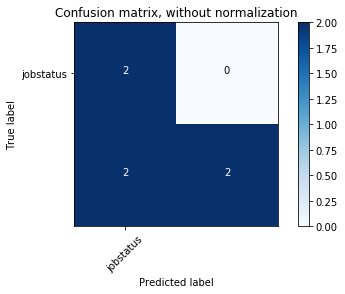

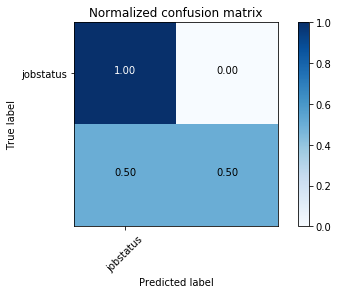

In [210]:
Y_pred = clf_C.fit(X_train, Y_train).predict(X_test)

cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [196]:
final['willingtoRelocate']

0      0
1      0
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
30     0
      ..
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    1
105    1
106    1
107    0
108    0
109    0
110    0
111    1
112    1
113    0
114    0
115    1
116    0
117    1
118    1
119    0
120    1
121    1
Name: willingtoRelocate, Length: 121, dtype: object